# Рейсы в США с Pandas, Matplotlib и Seaborn

![image.png](attachment:image.png)

### Ваша задача:
- написать код и выполнить вычисления в ячейках ниже (там где будут вопросы)

In [1]:
pip install pandas matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%config InlineBackend.figure_format = 'retina'

* Скачать данные [архив](https://drive.google.com/file/d/1lGEDDVgD8QYMf9Fio_NG6jBWOF4Ttr7e/view?usp=sharing) (В архиве ~ 111 Мб, в разархивированном виде – ~ 690 Мб). Не нужно распаковывать — Pandas может сам это сделать.
* Поместите его в папку там где лежит ваш Jupyter.
* Набор данных содержит информацию о перевозчиках и рейсах между аэропортами США в течение 2008 года.
* Описание столбцов доступно [здесь] (https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ). Посетите этот сайт, чтобы найти значение кодов отмены рейса. И в целом лучше понимать что за данные у нас есть.

Рассмотрим следующие термины, которые мы используем:
* уникальный рейс – запись (строка) в наборе данных
* завершенный рейс – рейс, который не отменен (Cancelled==0 в наборе данных)
* код рейса – комбинация ['UniqueCarrier','FlightNum'], т.е. UA52
* код аэропорта – трехбуквенный псевдоним аэропорта из столбцов «Origin» или «Dest».

**Чтение данных и создание объекта Pandas ``DataFrame``**

(Это может занять некоторое время, будьте терпеливы)

Мы не собираемся читать весь набор данных. Чтобы уменьшить объем памяти, мы вместо этого загружаем только необходимые столбцы и приводим их к подходящим типам данных.

In [61]:
dtype = {
    "DayOfWeek": 'uint8',
    "DayofMonth": 'uint8',
    "Month": 'uint8',
    "Cancelled": 'uint8',
    "Year": 'uint16',
    "FlightNum": 'int32',
    "Origin": 'category',
    "Dest": 'category',
    "UniqueCarrier": 'category',
    "DepTime": 'float32',  # Change to float32 or float64
    "ArrTime": 'float32',  # Change to float32 or float64
    "SecurityDelay": 'float32',  # Change to float32 or float64
    "LateAircraftDelay": 'float32',  # Change to float32 or float64
     "Distance": 'float32',
     "DepDelay": 'float32',
    "CancellationCode": 'category',
     "WeatherDelay": 'float32',
    "ArrDelay": 'float32',  # Убедитесь, что столбец загружен правильно
    "Dest": 'category'
}

# Load the data
flights_df = pd.read_csv("flights_2008.csv.bz2", usecols=dtype.keys(), dtype=dtype)


**Проверьте количество строк и столбцов и распечатайте имена столбцов.**

In [8]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 13)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'Origin', 'Dest', 'Cancelled',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Распечатайте первые 5 строк набора данных.**

In [9]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,Origin,Dest,Cancelled,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,2211.0,WN,335,IAD,TPA,0,NaN,NaN
1,2008,1,3,4,754.0,1002.0,WN,3231,IAD,TPA,0,NaN,NaN
2,2008,1,3,4,628.0,804.0,WN,448,IND,BWI,0,NaN,NaN
3,2008,1,3,4,926.0,1054.0,WN,1746,IND,BWI,0,NaN,NaN
4,2008,1,3,4,1829.0,1959.0,WN,3920,IND,BWI,0,0.0,32.0


**Изучите типы данных всех столбцов.**

In [10]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 13 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Year               uint16  
 1   Month              uint8   
 2   DayofMonth         uint8   
 3   DayOfWeek          uint8   
 4   DepTime            float32 
 5   ArrTime            float32 
 6   UniqueCarrier      category
 7   FlightNum          int32   
 8   Origin             category
 9   Dest               category
 10  Cancelled          uint8   
 11  SecurityDelay      float32 
 12  LateAircraftDelay  float32 
dtypes: category(3), float32(4), int32(1), uint16(1), uint8(4)
memory usage: 207.3 MB


**Получите базовую статистику по каждому столбцу.**

In [11]:
flights_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,Cancelled,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,6.858079e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333831e+03,1.481258e+03,2.224200e+03,1.960618e-02,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.783713e+02,5.010738e+02,1.961716e+03,1.386426e-01,1.836461e+00,3.914056e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,1.107000e+03,6.220000e+02,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.512000e+03,1.571000e+03,0.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.909000e+03,3.518000e+03,0.000000e+00,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,9.743000e+03,1.000000e+00,3.920000e+02,1.316000e+03


**Подсчитайте уникальных перевозчиков и определите их относительную долю рейсов:**

In [12]:
flights_df["UniqueCarrier"].nunique()

20

<ipython-input-13-06a138db3435>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights_df.groupby("UniqueCarrier").size().plot(kind="bar");


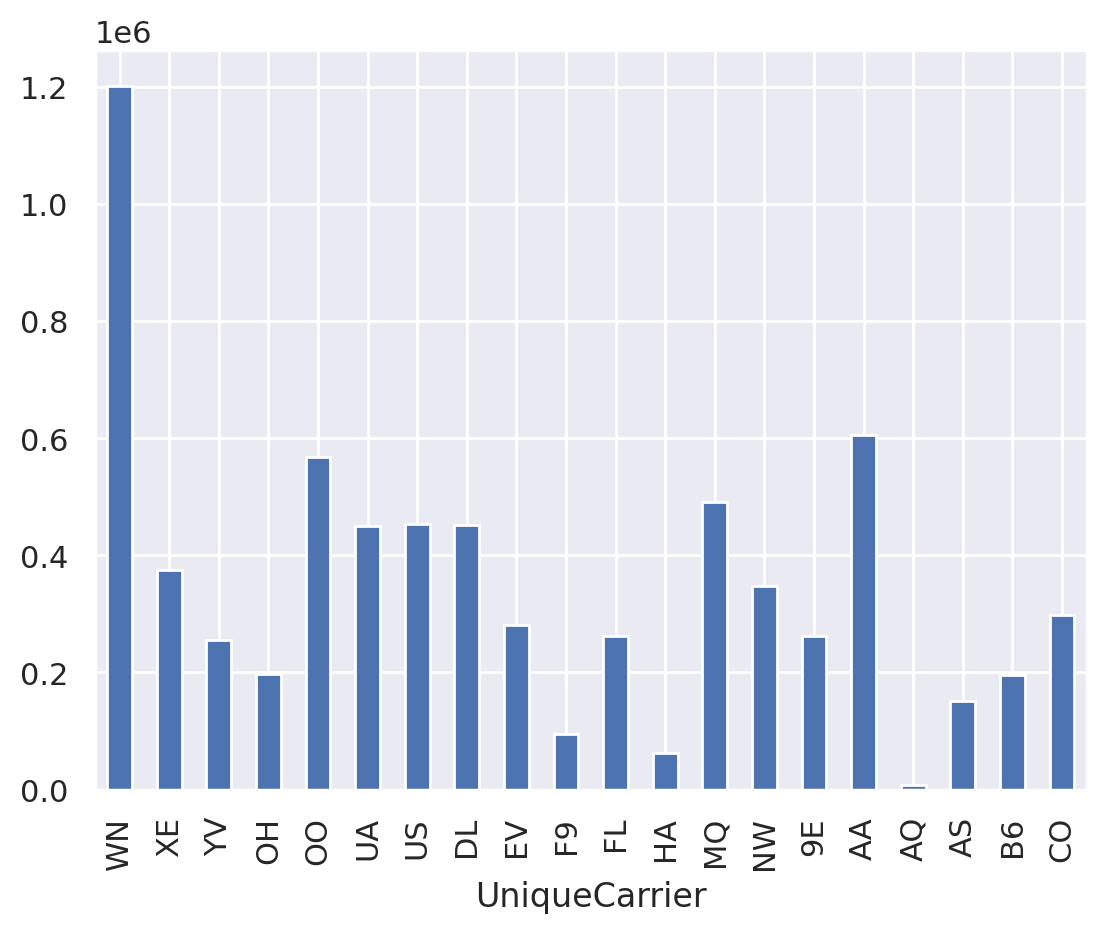

In [13]:
# Количество рейсов по перевозчикам
flights_df.groupby("UniqueCarrier").size().plot(kind="bar");

**Мы также можем группировать по категориям, чтобы рассчитывать различные агрегированные статистические данные.**

**Например, поиск топ-3 кодов рейсов с наибольшим общим расстоянием, пройденным в 2008 году.**

In [17]:
flights_df.groupby(["UniqueCarrier", "FlightNum"])["Distance"].sum().sort_values(ascending=False).iloc[:3]


<ipython-input-17-77d90fa862ca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights_df.groupby(["UniqueCarrier", "FlightNum"])["Distance"].sum().sort_values(ascending=False).iloc[:3]


UniqueCarrier  FlightNum
CO             14           1796244.0
               15           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float32

**Другой способ:**

In [18]:
flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg({"Distance": [np.mean, np.sum, "count"], "Cancelled": np.sum}
                                                      ).sort_values(("Distance", "sum"), ascending=False).iloc[0:3]

<ipython-input-18-2b2abf089734>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg({"Distance": [np.mean, np.sum, "count"], "Cancelled": np.sum}
<ipython-input-18-2b2abf089734>:1: FutureWarning: The provided callable <function mean at 0x7eedab9b8280> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  flights_df.groupby(["UniqueCarrier", "FlightNum"]).agg({"Distance": [np.mean, np.sum, "count"], "Cancelled": np.sum}
<ipython-input-18-2b2abf089734>:1: FutureWarning: The provided callable <function sum at 0x7eedab9972e0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used dire

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            14         4962.000000  1796244.0   362         0
              15         4962.000000  1796244.0   362         0
UA            52         2465.181885  1789722.0   726         8

**Количество рейсов по дням недели и месяцам:**

In [19]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Гистограмма дальности полета:**

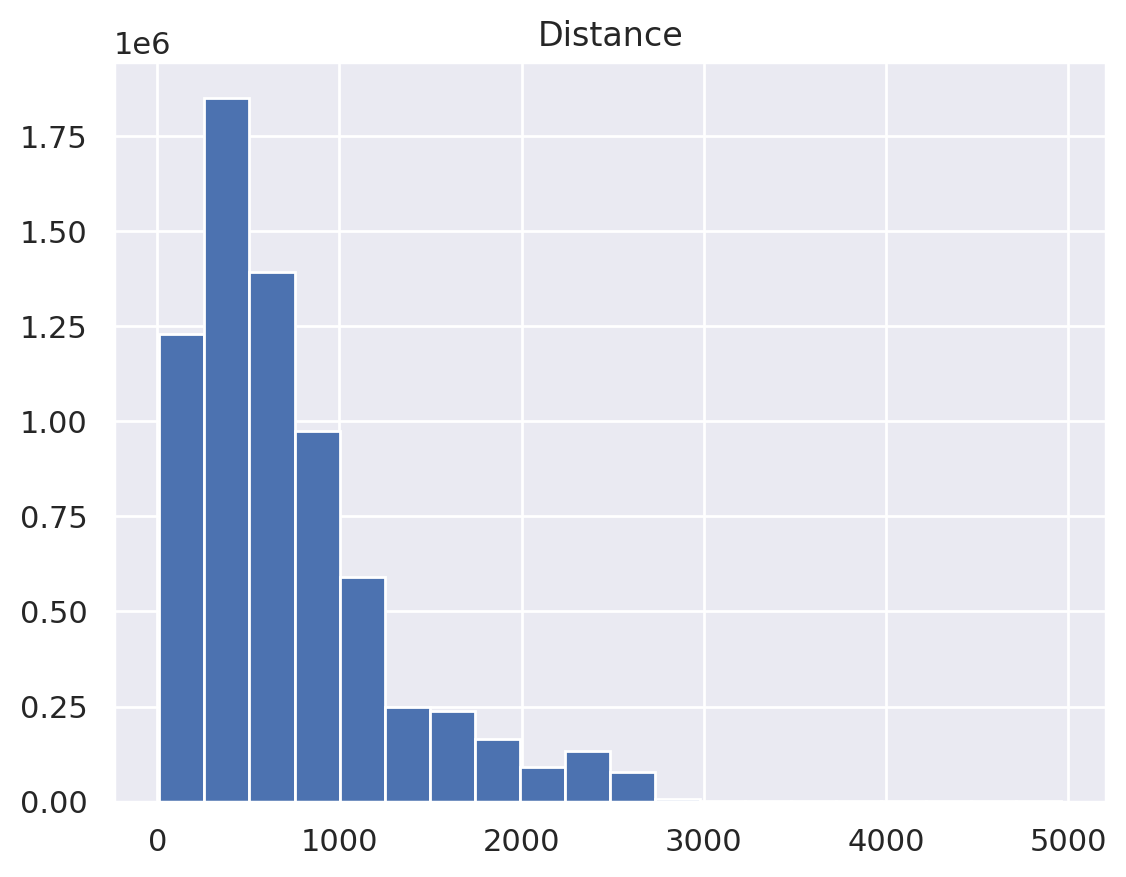

In [20]:
flights_df.hist("Distance", bins=20);

**Составление гистограммы частоты рейсов по дате.**

In [21]:
flights_df["Date"] = pd.to_datetime(
    flights_df.rename(columns={"DayofMonth": "Day"})[["Year", "Month", "Day"]]
)

In [22]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,Origin,Dest,Distance,Cancelled,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,2211.0,WN,335,IAD,TPA,810.0,0,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,1002.0,WN,3231,IAD,TPA,810.0,0,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,804.0,WN,448,IND,BWI,515.0,0,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,1054.0,WN,1746,IND,BWI,515.0,0,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,1959.0,WN,3920,IND,BWI,515.0,0,0.0,32.0,2008-01-03


In [23]:
num_flights_by_date = flights_df.groupby("Date").size()

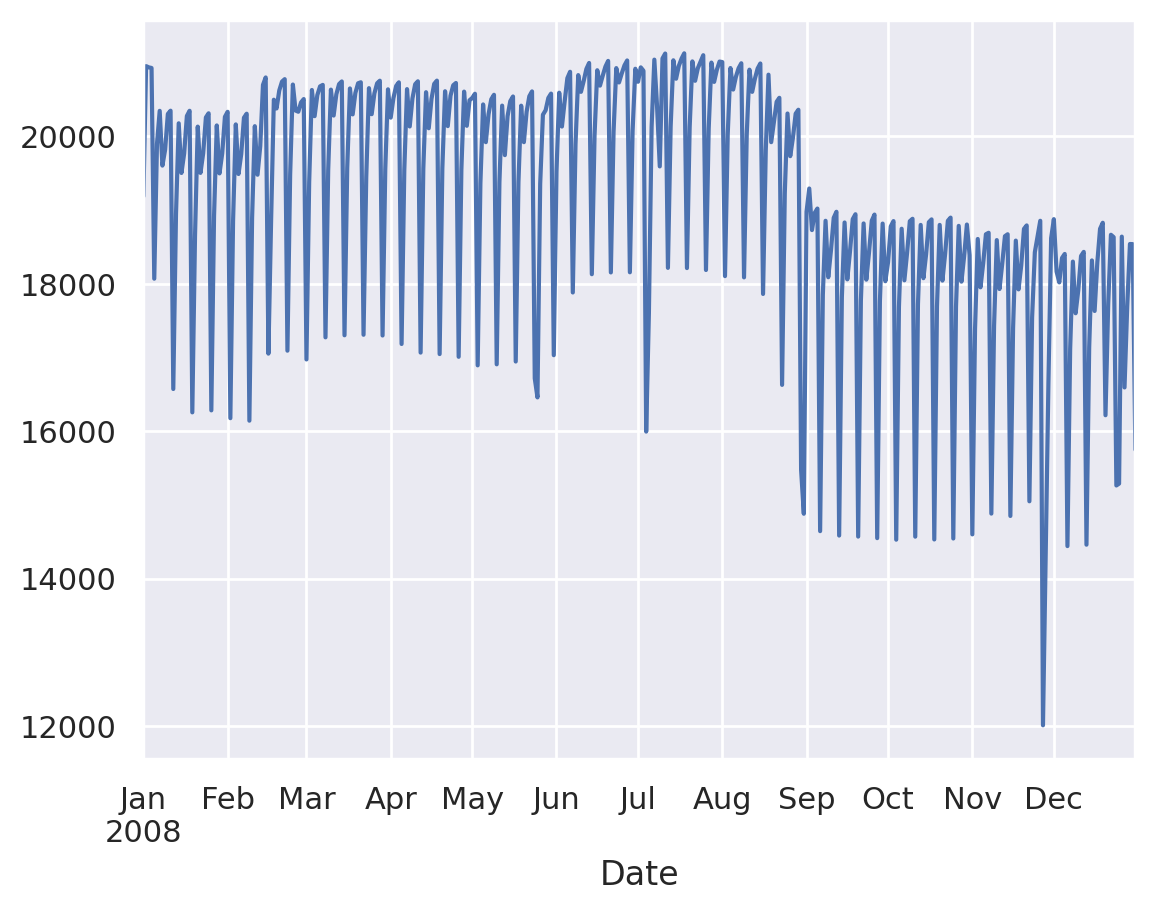

In [24]:
num_flights_by_date.plot();

**Видите ли вы какую-то зависимость по неделям, еженедельную динамику выше? И ниже?**

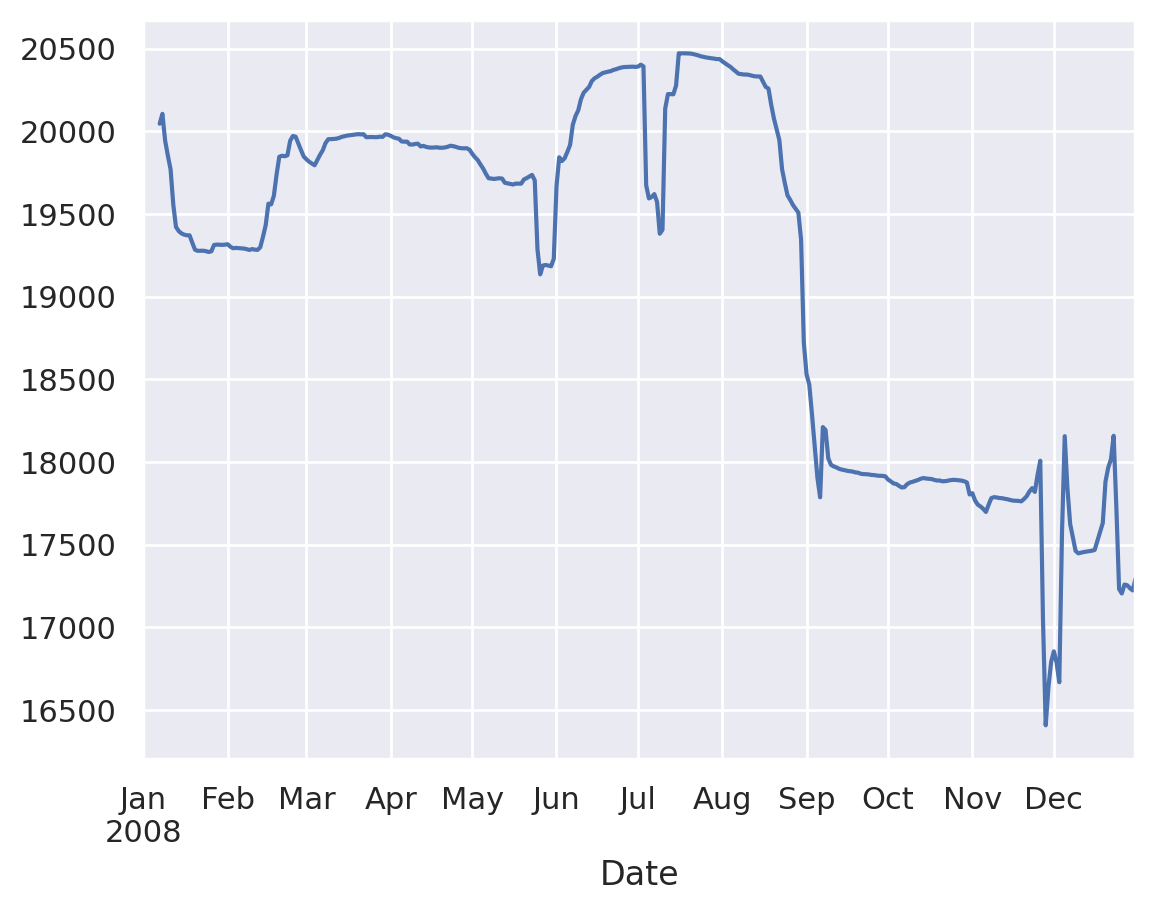

In [25]:
num_flights_by_date.rolling(window=7).mean().plot();

**Нам понадобится новый столбец в нашем наборе данных — час отправления, давайте создадим его.**

Как мы видим, `DepTime` распределяется от 1 до 2400 (оно задаётся в формате `hhmm`, проверьте [описание столбца](https://www.transtats.bts.gov/Fields.asp?Table_ID=236 ) снова). Мы будем рассматривать час отправления как `DepTime` // 100 (разделите на 100 и примените функцию `floor`). Однако теперь у нас будет и час 0, и час 24. Час 24 звучит странно, вместо этого мы установим его равным 0 (типичное несовершенство реальных данных, однако вы можете проверить, что оно влияет только на 521 строку, что вроде ничего страшного). Итак, теперь значения нового столбца `DepHour` будут распределены от 0 до 23. Есть некоторые недостающие значения, пока мы не будем их заполнять, а просто проигнорируем.

In [26]:
flights_df["DepHour"] = flights_df["DepTime"] // 100
flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)

<ipython-input-26-1f56594c1537>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)


In [27]:
flights_df["DepHour"].describe()

,DepHour
count,6.873482e+06
mean,1.303737e+01
std,4.764949e+00
min,0.000000e+00
25%,9.000000e+00
50%,1.300000e+01
75%,1.700000e+01
max,2.300000e+01


# Теперь твоя очередь. Ответить на вопросы ниже.

**<font color='red'>Вопрос 1.</font> Набор данных включает как отмененные, так и завершенные рейсы. Определите, есть ли больше выполненных или отмененных рейсов, и посчитайте числовую разницу между ними.** <br>

- Отмененных рейсов больше, чем выполненных на 329.
- Выполнено рейсов больше отмененных на 6 734 860.
- Отмененные рейсы превышают выполненные на 671.
- Выполнено рейсов больше, чем отменено на 11 088 967.

In [28]:
# Подсчёт количества завершённых и отменённых рейсов
completed_flights = flights_df[flights_df['Cancelled'] == 0].shape[0]
cancelled_flights = flights_df[flights_df['Cancelled'] == 1].shape[0]

# Разница между завершенными и отмененными рейсами
difference = completed_flights - cancelled_flights

# Вывод результатов
print(f"Завершенных рейсов: {completed_flights}")
print(f"Отмененных рейсов: {cancelled_flights}")
print(f"Разница между завершёнными и отменёнными рейсами: {difference}")


Завершенных рейсов: 6872294
Отмененных рейсов: 137434
Разница между завершёнными и отменёнными рейсами: 6734860


**<font color='red'>Вопрос 2.</font> Найдите рейс с наибольшей задержкой вылета и рейс с наибольшей задержкой прибытия. Летят ли они в один аэропорт, и если да, то какой у него код?**

- да, ATL
- да, HNL
- да, MSP
- нет

In [62]:
# Найти индекс рейса с наибольшей задержкой вылета
max_dep_delay_index = flights_df['DepDelay'].idxmax()

# Получить информацию о рейсе с наибольшей задержкой вылета
max_dep_delay_flight = flights_df.loc[max_dep_delay_index]
print(f"Рейс с наибольшей задержкой вылета: {max_dep_delay_flight}")
# Найти индекс рейса с наибольшей задержкой прибытия
max_arr_delay_index = flights_df['ArrDelay'].idxmax()

# Получить информацию о рейсе с наибольшей задержкой прибытия
max_arr_delay_flight = flights_df.loc[max_arr_delay_index]
print(f"Рейс с наибольшей задержкой прибытия: {max_arr_delay_flight}")
# Получить коды аэропортов назначения для обоих рейсов
dest_dep_delay = max_dep_delay_flight['Dest']
dest_arr_delay = max_arr_delay_flight['Dest']

# Проверить, совпадают ли коды аэропортов назначения
if dest_dep_delay == dest_arr_delay:
    print(f"Да, оба рейса летят в один и тот же аэропорт: {dest_dep_delay}")
else:
    print("Нет, рейсы летят в разные аэропорты")

Рейс с наибольшей задержкой вылета: Year                   2008
Month                     4
DayofMonth               10
DayOfWeek                 4
DepTime               724.0
ArrTime               858.0
UniqueCarrier            NW
FlightNum              1699
ArrDelay             2453.0
DepDelay             2467.0
Origin                  CLT
Dest                    MSP
Distance              930.0
Cancelled                 0
CancellationCode        NaN
WeatherDelay            0.0
SecurityDelay           0.0
LateAircraftDelay      17.0
Name: 2235378, dtype: object
Рейс с наибольшей задержкой прибытия: Year                   2008
Month                     2
DayofMonth                3
DayOfWeek                 7
DepTime              1117.0
ArrTime              2256.0
UniqueCarrier            NW
FlightNum               808
ArrDelay             2461.0
DepDelay             2457.0
Origin                  HNL
Dest                    MSP
Distance             3972.0
Cancelled                 0
C

**<font color='red'>Вопрос 3.</font> Найдите перевозчика, у которого наибольшее количество отмененных рейсов.**

- АА
- MQ
- ВН
- СО

In [31]:
# Фильтрация только отмененных рейсов
cancelled_flights = flights_df[flights_df['Cancelled'] == 1]

# Группировка по перевозчику и подсчет количества отмененных рейсов
cancelled_by_carrier = cancelled_flights.groupby('UniqueCarrier').size()

# Найти перевозчика с наибольшим количеством отмен
max_cancelled_carrier = cancelled_by_carrier.idxmax()
max_cancelled_count = cancelled_by_carrier.max()

print(f"Перевозчик с наибольшим количеством отмен: {max_cancelled_carrier} ({max_cancelled_count} рейсов)")


Перевозчик с наибольшим количеством отмен: MQ (18331 рейсов)


<ipython-input-31-45e5752f6293>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelled_by_carrier = cancelled_flights.groupby('UniqueCarrier').size()


**<font color='red'>Вопрос 4.</font> Давайте рассмотрим время отправления и рассмотрим распределение по часам (столбец `DepHour`, который мы создали ранее). В какой час самый высокий процент рейсов?**<br>

*Подсказка:* Проверьте формат времени [здесь](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

- 1 am
- 5 am  
- 8 am
- 3 pm

In [32]:
# Убедитесь, что столбец DepTime содержит непустые значения, иначе уберите их
flights_df_clean = flights_df.dropna(subset=['DepTime'])

# Создаем столбец DepHour, преобразуя DepTime в часы
flights_df_clean['DepHour'] = flights_df_clean['DepTime'] // 100


<ipython-input-32-152e51c897a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_df_clean['DepHour'] = flights_df_clean['DepTime'] // 100


In [33]:
# Подсчет количества рейсов по часам
hourly_flights = flights_df_clean['DepHour'].value_counts(normalize=True) * 100

# Найти час с наибольшим процентом рейсов
max_hour = hourly_flights.idxmax()
max_percentage = hourly_flights.max()

print(f"Час с наибольшим количеством рейсов: {int(max_hour)}:00, {max_percentage:.2f}% всех рейсов")


Час с наибольшим количеством рейсов: 8:00, 6.54% всех рейсов


**<font color='red'>Вопрос 5.</font> Хорошо, теперь давайте рассмотрим распределение отмененных рейсов по времени. В какой час наименьший процент отмененных рейсов?**<br>

- 2 am
- 9 pm  
- 8 am  
- 3 am

In [34]:
# Фильтрация отмененных рейсов
cancelled_flights = flights_df_clean[flights_df_clean['Cancelled'] == 1]

# Подсчет распределения отмененных рейсов по часам
cancelled_by_hour = cancelled_flights['DepHour'].value_counts(normalize=True) * 100


In [35]:
# Найти час с наименьшим процентом отмененных рейсов
min_cancelled_hour = cancelled_by_hour.idxmin()
min_cancelled_percentage = cancelled_by_hour.min()

print(f"Час с наименьшим процентом отмененных рейсов: {int(min_cancelled_hour)}:00, {min_cancelled_percentage:.2f}% всех отмененных рейсов")

Час с наименьшим процентом отмененных рейсов: 4:00, 0.08% всех отмененных рейсов


**<font color='red'>Вопрос 6.</font> Есть ли какой-нибудь час, в который вообще не было отмененных рейсов? Проверить все, что относится.**

- 3
- 19
- 22
- 4

In [36]:
# Фильтрация отмененных рейсов
cancelled_flights = flights_df_clean[flights_df_clean['Cancelled'] == 1]
# Подсчет количества отмененных рейсов по каждому часу
cancelled_by_hour = cancelled_flights['DepHour'].value_counts()

# Найти все часы с нулевым количеством отмененных рейсов
all_hours = set(range(24))  # Множество всех часов от 0 до 23
cancelled_hours = set(cancelled_by_hour.index)  # Множество часов, где были отмены
no_cancelled_hours = all_hours - cancelled_hours  # Часы, в которые не было отмен

print(f"Часы, в которые не было отмененных рейсов: {sorted(no_cancelled_hours)}")

Часы, в которые не было отмененных рейсов: [3]


**<font color='red'>Вопрос 7.</font> Найдите самый загруженный час или, другими словами, час, когда количество вылетающих рейсов достигает максимума.**<br>

*Подсказка:* Учитывайте только *завершенные* рейсы.

- 4
- 7
- 8
- 17

In [38]:
# Фильтрация завершенных рейсов
completed_flights = flights_df_clean[flights_df_clean['Cancelled'] == 0]
# Подсчет количества завершенных рейсов по каждому часу
hourly_completed_flights = completed_flights['DepHour'].value_counts()

# Найти час с наибольшим количеством завершенных рейсов
busiest_hour = hourly_completed_flights.idxmax()
max_flights = hourly_completed_flights.max()

print(f"Самый загруженный час: {int(busiest_hour)}:00 с {max_flights} рейсами")


Самый загруженный час: 8:00 с 449145 рейсами


**<font color='red'>Вопрос 8.</font> Поскольку мы знаем час отправления, было бы интересно изучить среднюю задержку для соответствующего часа. Бывают ли случаи, когда самолеты в среднем вылетали раньше положенного? И если да, то в какое время это произошло?**<br>

*Подсказка:* Учитывайте только *завершенные* рейсы.

- нет, таких случаев не бывает
- да, в 5-6 утра
- да, в 9-10 утра
- да, в 14-16.00

In [44]:

# Фильтрация завершенных рейсов
completed_flights = flights_df_clean[flights_df_clean['Cancelled'] == 0]
# Рассчитать среднюю задержку по каждому часу
mean_delay_by_hour = completed_flights.groupby('DepHour')['DepDelay'].mean()

# Найти часы с отрицательной средней задержкой
early_departures = mean_delay_by_hour[mean_delay_by_hour < 0]

if not early_departures.empty:
    print(f"Часы с отрицательной средней задержкой (самолеты вылетали раньше):")
    print(early_departures)
else:
    print("Нет случаев, когда самолеты вылетали раньше расписания.")


Часы с отрицательной средней задержкой (самолеты вылетали раньше):
DepHour
5.0   -4.255584
6.0   -1.629400
Name: DepDelay, dtype: float32


**<font color='red'>Вопрос 9.</font> Учитывая только выполненные перевозчиком рейсы, которые вы нашли в вопросе 3, найдите распределение этих рейсов по часам. В какое время вылетает наибольшее количество самолетов?**<br>

- в полдень
- в 7 утра
- в 8 утра
- в 10 утра

In [45]:
# Фильтруем завершенные рейсы (Cancelled == 0) для перевозчика с наибольшим количеством отмен
carrier_flights = flights_df_clean[(flights_df_clean['UniqueCarrier'] == max_cancelled_carrier) &
                                   (flights_df_clean['Cancelled'] == 0)]

In [46]:
# Создаем столбец DepHour, если его еще нет
carrier_flights['DepHour'] = carrier_flights['DepTime'] // 100

# Подсчет количества завершенных рейсов по каждому часу
hourly_distribution = carrier_flights['DepHour'].value_counts()

# Найти час с наибольшим количеством рейсов
busiest_hour = hourly_distribution.idxmax()
max_flights = hourly_distribution.max()

print(f"Наибольшее количество рейсов у перевозчика {max_cancelled_carrier} в {int(busiest_hour)}:00 — {max_flights} рейсов")

Наибольшее количество рейсов у перевозчика MQ в 10:00 — 33063 рейсов


<ipython-input-46-a6c7e8ab538d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carrier_flights['DepHour'] = carrier_flights['DepTime'] // 100


**<font color='red'>Вопрос 10.</font> Найдите топ-10 перевозчиков по количеству *выполненных* рейсов (столбец _UniqueCarrier_)?**

**Что из перечисленного ниже _нет_ в вашем списке топ-10?**
- DL
- AA
- OO
- EV

In [47]:
# Фильтрация завершенных рейсов
completed_flights = flights_df[flights_df['Cancelled'] == 0]
# Группировка по перевозчику и подсчет количества завершенных рейсов
carrier_counts = completed_flights.groupby('UniqueCarrier').size().sort_values(ascending=False)
# Получить топ-10 перевозчиков
top_10_carriers = carrier_counts.head(10)

print("Топ-10 перевозчиков по количеству выполненных рейсов:")
print(top_10_carriers)
# Список перевозчиков для проверки
carriers_to_check = ['DL', 'AA', 'OO', 'EV']

# Проверяем, кого из них нет в топ-10
missing_carriers = [carrier for carrier in carriers_to_check if carrier not in top_10_carriers.index]

print("Этих перевозчиков нет в топ-10:", missing_carriers)

Топ-10 перевозчиков по количеству выполненных рейсов:
UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64
Этих перевозчиков нет в топ-10: ['EV']


<ipython-input-47-d5c640852236>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_counts = completed_flights.groupby('UniqueCarrier').size().sort_values(ascending=False)


**<font color='red'>Вопрос 11.</font> Постройте распределение причин отмены рейса (CancellationCode).**

**Какая наиболее частая причина отмены рейса? (Используйте эту [ссылку](https://www.transtats.bts.gov/Fields.asp?Table_ID=236), чтобы перевести коды в причины)**
- Перевозчик
- Погодные условия
- Национальная воздушная система
- Причины безопасности

In [50]:
# Фильтрация отмененных рейсов
cancelled_flights = flights_df[flights_df['Cancelled'] == 1]
# Подсчет количества отмен по каждой причине (CancellationCode)
cancellation_reasons = cancelled_flights['CancellationCode'].value_counts()

print("Распределение причин отмены:")
print(cancellation_reasons)
# Найти наиболее частую причину отмены
most_common_reason_code = cancellation_reasons.idxmax()
most_common_reason_count = cancellation_reasons.max()

# Перевод кодов в причины
reason_map = {
    'A': 'Перевозчик',
    'B': 'Погодные условия',
    'C': 'Национальная воздушная система',
    'D': 'Причины безопасности'
}

most_common_reason = reason_map[most_common_reason_code]

print(f"Наиболее частая причина отмены: {most_common_reason} ({most_common_reason_count} отмен)")

Распределение причин отмены:
CancellationCode
B    54904
A    54330
C    28188
D       12
Name: count, dtype: int64
Наиболее частая причина отмены: Погодные условия (54904 отмен)


**<font color='red'>Вопрос 12.</font> Какой маршрут наиболее частый по количеству рейсов?**

(Обратите внимание на столбцы _'Origin'_ и _'Dest'_. Рассматривайте направления _A->B_ и _B->A_ как _разные_ маршруты)

  - Нью-Йорк – Вашингтон (JFK-IAD)
  - Сан-Франциско – Лос-Анджелес (SFO-LAX)
  - Сан-Хосе – Даллас (SJC-DFW)
  - Нью-Йорк – Сан-Франциско (JFK-SFO)

In [51]:
# Группировка по маршрутам (Origin и Dest) и подсчет количества рейсов для каждого маршрута
route_counts = flights_df.groupby(['Origin', 'Dest']).size().sort_values(ascending=False)

# Показать топ-5 самых частых маршрутов
print("Топ-5 самых частых маршрутов:")
print(route_counts.head())
# Найти самый частый маршрут
most_frequent_route = route_counts.idxmax()
most_frequent_route_count = route_counts.max()

print(f"Самый частый маршрут: {most_frequent_route[0]} -> {most_frequent_route[1]} ({most_frequent_route_count} рейсов)")

<ipython-input-51-3622da48cd26>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  route_counts = flights_df.groupby(['Origin', 'Dest']).size().sort_values(ascending=False)


Топ-5 самых частых маршрутов:
Origin  Dest
SFO     LAX     13788
LAX     SFO     13390
OGG     HNL     12383
LGA     BOS     12035
BOS     LGA     12029
dtype: int64
Самый частый маршрут: SFO -> LAX (13788 рейсов)


**<font color='red'>Вопрос 13.</font> . Найдите топ-5 задержанных маршрутов (посчитайте, сколько раз они задерживались при отправлении). Из всех рейсов по этим 5 маршрутам посчитайте все рейсы, погодные условия которых способствовали задержке.**

_Подсказка_: учитывайте только положительные задержки

- 449
- 539
- 549
- 668

In [54]:
# Отфильтровать только рейсы с положительными задержками
delayed_flights = flights_df[flights_df['DepDelay'] > 0]
# Группировка по маршрутам и подсчет количества задержек
delayed_routes = delayed_flights.groupby(['Origin', 'Dest']).size().sort_values(ascending=False)

# Получить топ-5 маршрутов с наибольшим количеством задержек
top_5_delayed_routes = delayed_routes.head(5)

print("Топ-5 маршрутов с наибольшим количеством задержек:")
print(top_5_delayed_routes)
# Отфильтровать рейсы для топ-5 маршрутов
top_5_routes = top_5_delayed_routes.index
top_5_flights = delayed_flights[delayed_flights[['Origin', 'Dest']].apply(tuple, axis=1).isin(top_5_routes)]

# Найти рейсы, задержанные из-за погодных условий
weather_delayed_flights = top_5_flights[top_5_flights['WeatherDelay'] > 0]

# Подсчитать количество таких рейсов
weather_delay_count = weather_delayed_flights.shape[0]

print(f"Количество рейсов, задержанных из-за погодных условий по топ-5 маршрутам: {weather_delay_count}")

<ipython-input-54-f08c491c18aa>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delayed_routes = delayed_flights.groupby(['Origin', 'Dest']).size().sort_values(ascending=False)


Топ-5 маршрутов с наибольшим количеством задержек:
Origin  Dest
LAX     SFO     6253
DAL     HOU     5742
SFO     LAX     5322
ORD     LGA     5311
HOU     DAL     5288
dtype: int64
Количество рейсов, задержанных из-за погодных условий по топ-5 маршрутам: 668


**<font color='red'>Вопрос 14.</font> Изучите почасовое распределение времени отправления. Выберите все верные утверждения:**

  - Рейсы равномерно распределены во временном интервале [0-23].
  - В период с 0 до 4 утра рейсов значительно меньше, чем с 19:00 до 20:00.

<ipython-input-55-dbbaf0a1daf5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_df_clean['DepHour'] = flights_df_clean['DepTime'] // 100
<ipython-input-55-dbbaf0a1daf5>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_flights.index, y=hourly_flights.values, palette="Blues_d")


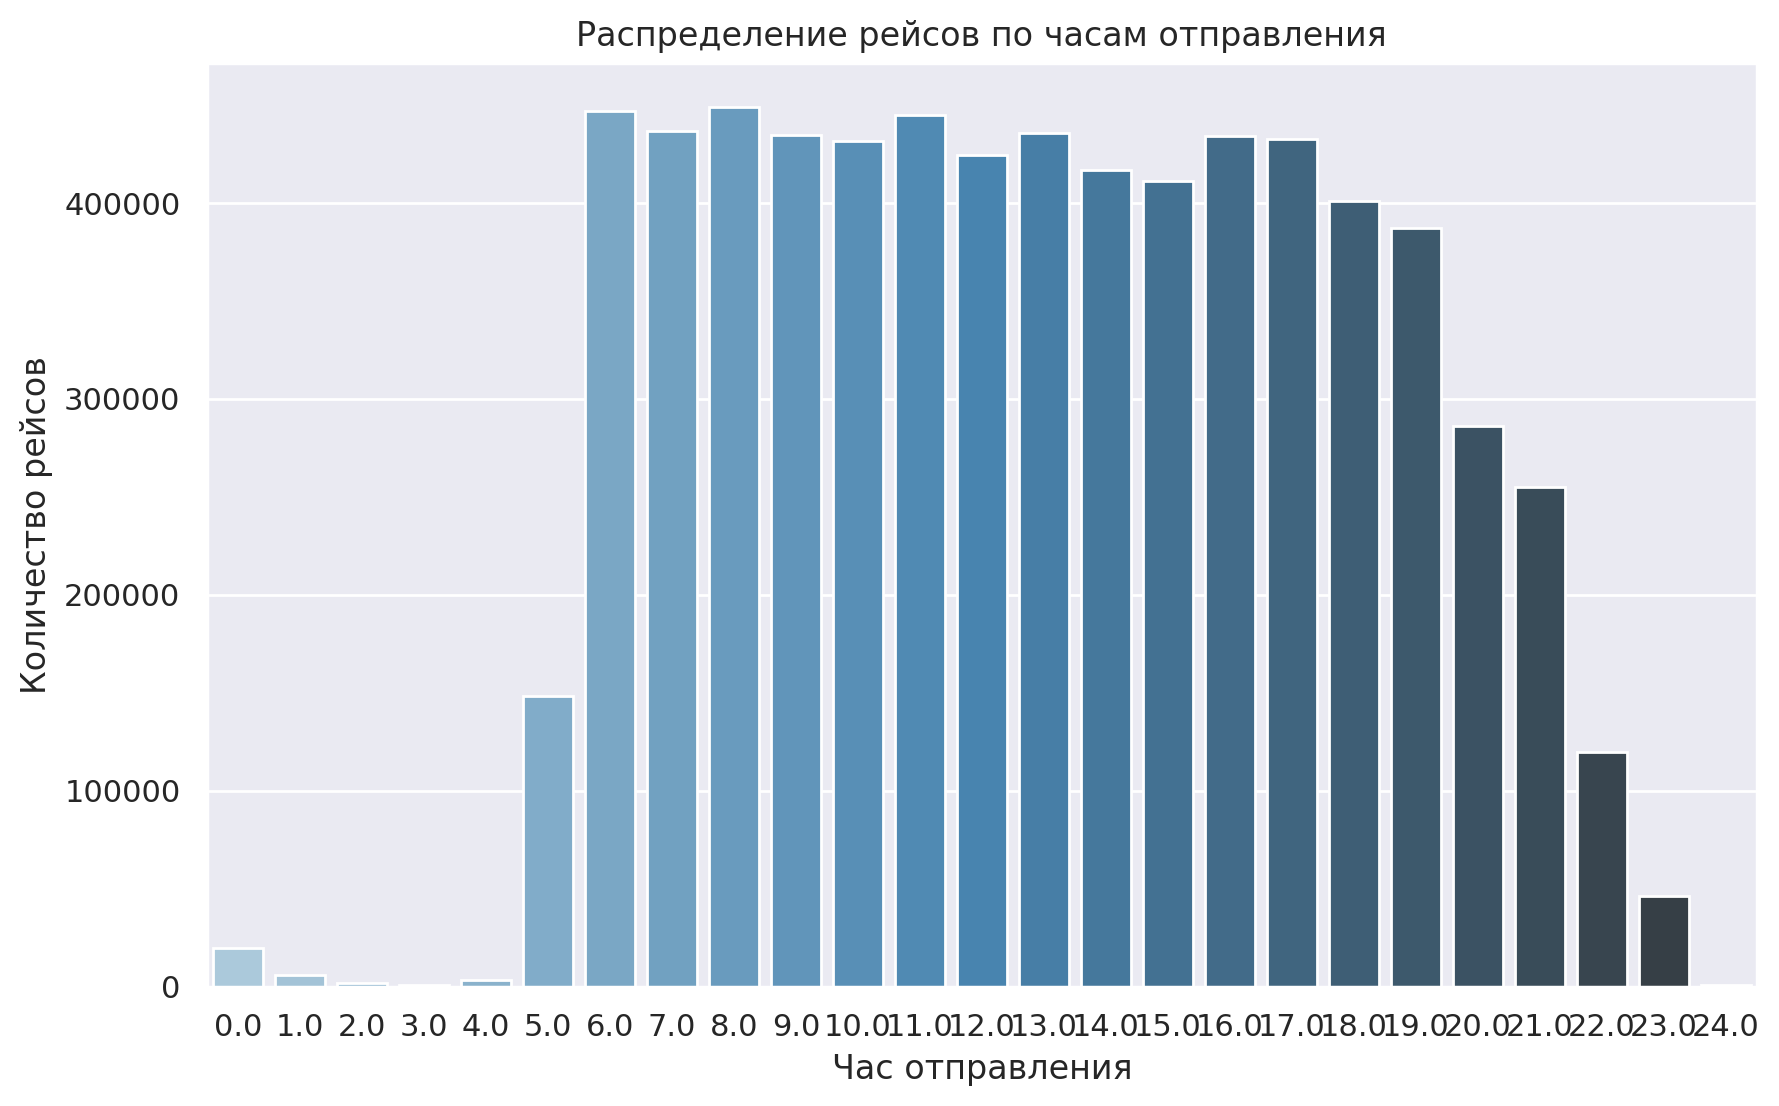

Рейсов с 0 до 4 утра: 31782
Рейсов с 19:00 до 20:00: 673279


In [55]:
# Убедитесь, что нет пропущенных значений в DepTime
flights_df_clean = flights_df.dropna(subset=['DepTime'])

# Создаем столбец DepHour
flights_df_clean['DepHour'] = flights_df_clean['DepTime'] // 100
import matplotlib.pyplot as plt
import seaborn as sns

# Подсчет количества рейсов по часам
hourly_flights = flights_df_clean['DepHour'].value_counts().sort_index()

# Визуализация распределения рейсов по часам
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_flights.index, y=hourly_flights.values, palette="Blues_d")
plt.title('Распределение рейсов по часам отправления')
plt.xlabel('Час отправления')
plt.ylabel('Количество рейсов')
plt.show()
# Количество рейсов с 0 до 4 утра
early_morning_flights = flights_df_clean[(flights_df_clean['DepHour'] >= 0) & (flights_df_clean['DepHour'] < 5)].shape[0]

# Количество рейсов с 19:00 до 20:00
evening_flights = flights_df_clean[(flights_df_clean['DepHour'] >= 19) & (flights_df_clean['DepHour'] < 21)].shape[0]

print(f"Рейсов с 0 до 4 утра: {early_morning_flights}")
print(f"Рейсов с 19:00 до 20:00: {evening_flights}")


**<font color='red'>Вопрос 15.</font> Покажите, как количество рейсов меняется со временем (ежедневно/еженедельно/ежемесячно) и интерпретируйте полученные результаты.**

**Выберите все правильные утверждения:**
- Количество рейсов в выходные дни меньше, чем в будние (рабочие дни).
- Наименьшее количество рейсов приходится на воскресенье.
- Зимой рейсов меньше, чем летом.

_Подсказка_: ищите официальные метеорологические зимние месяцы для Северного полушария.

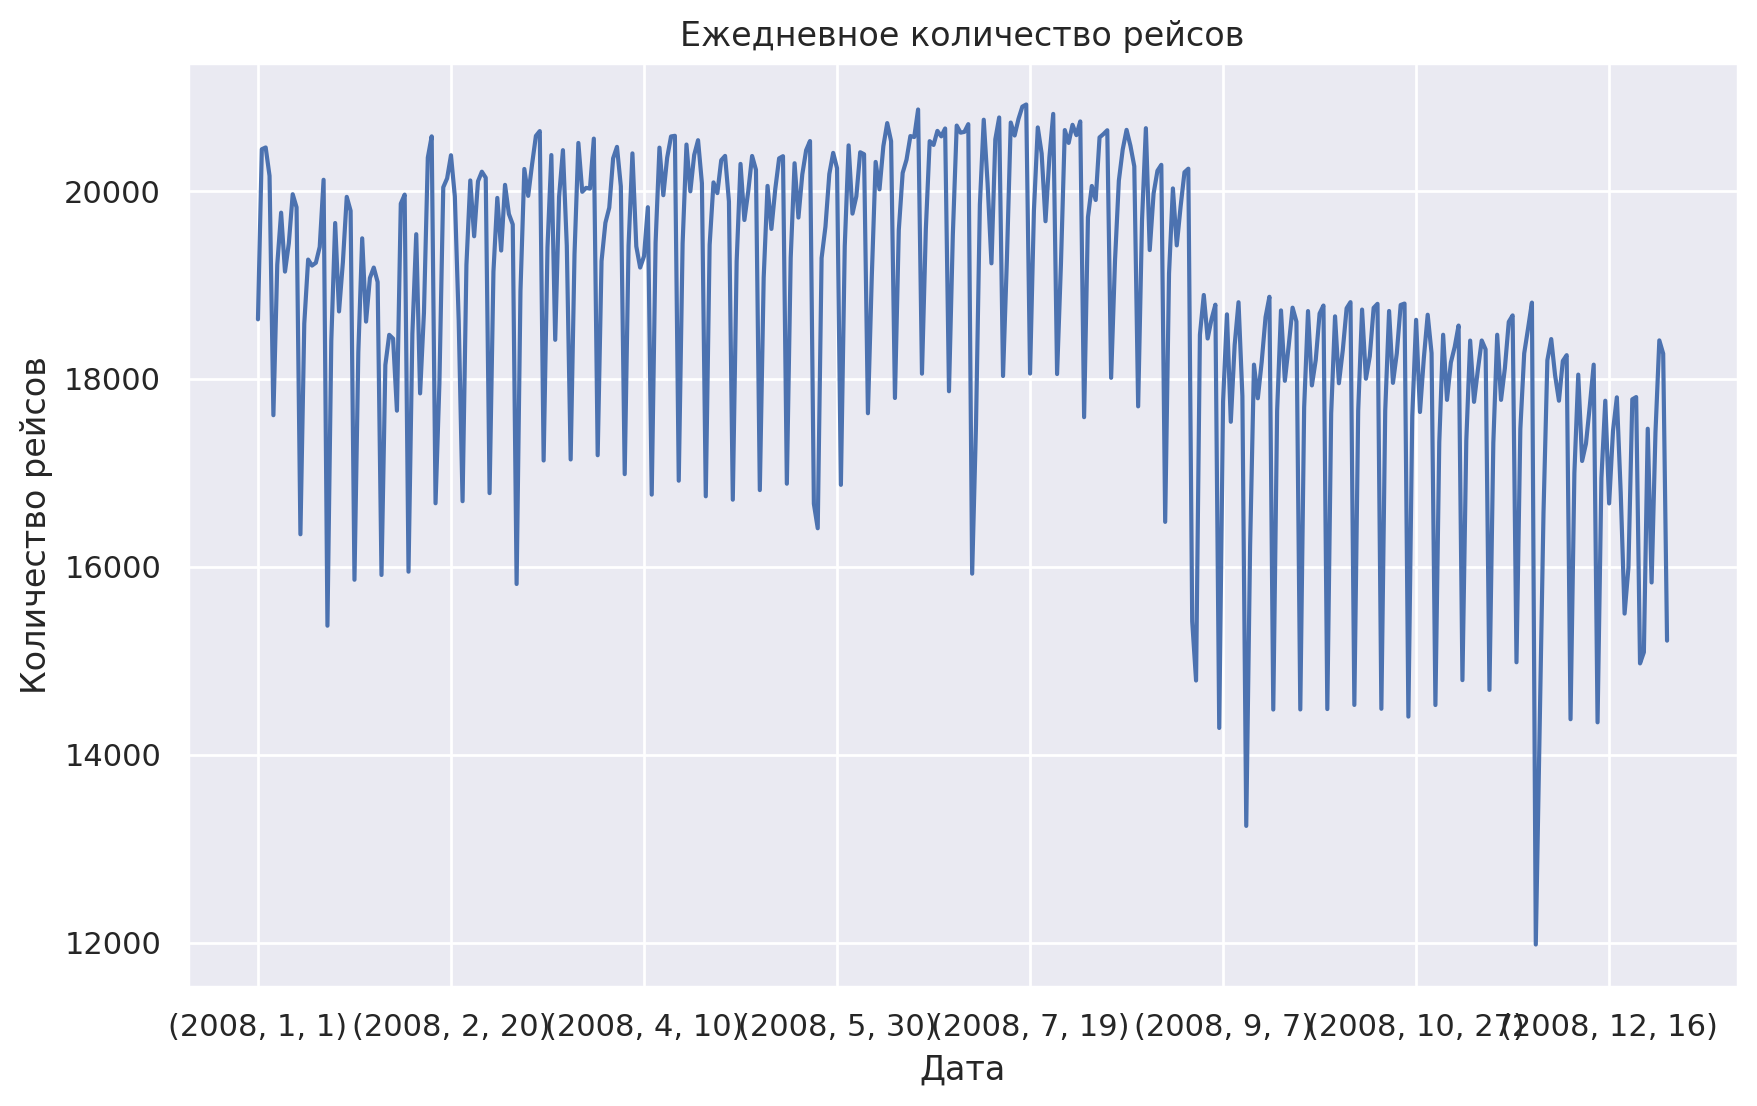

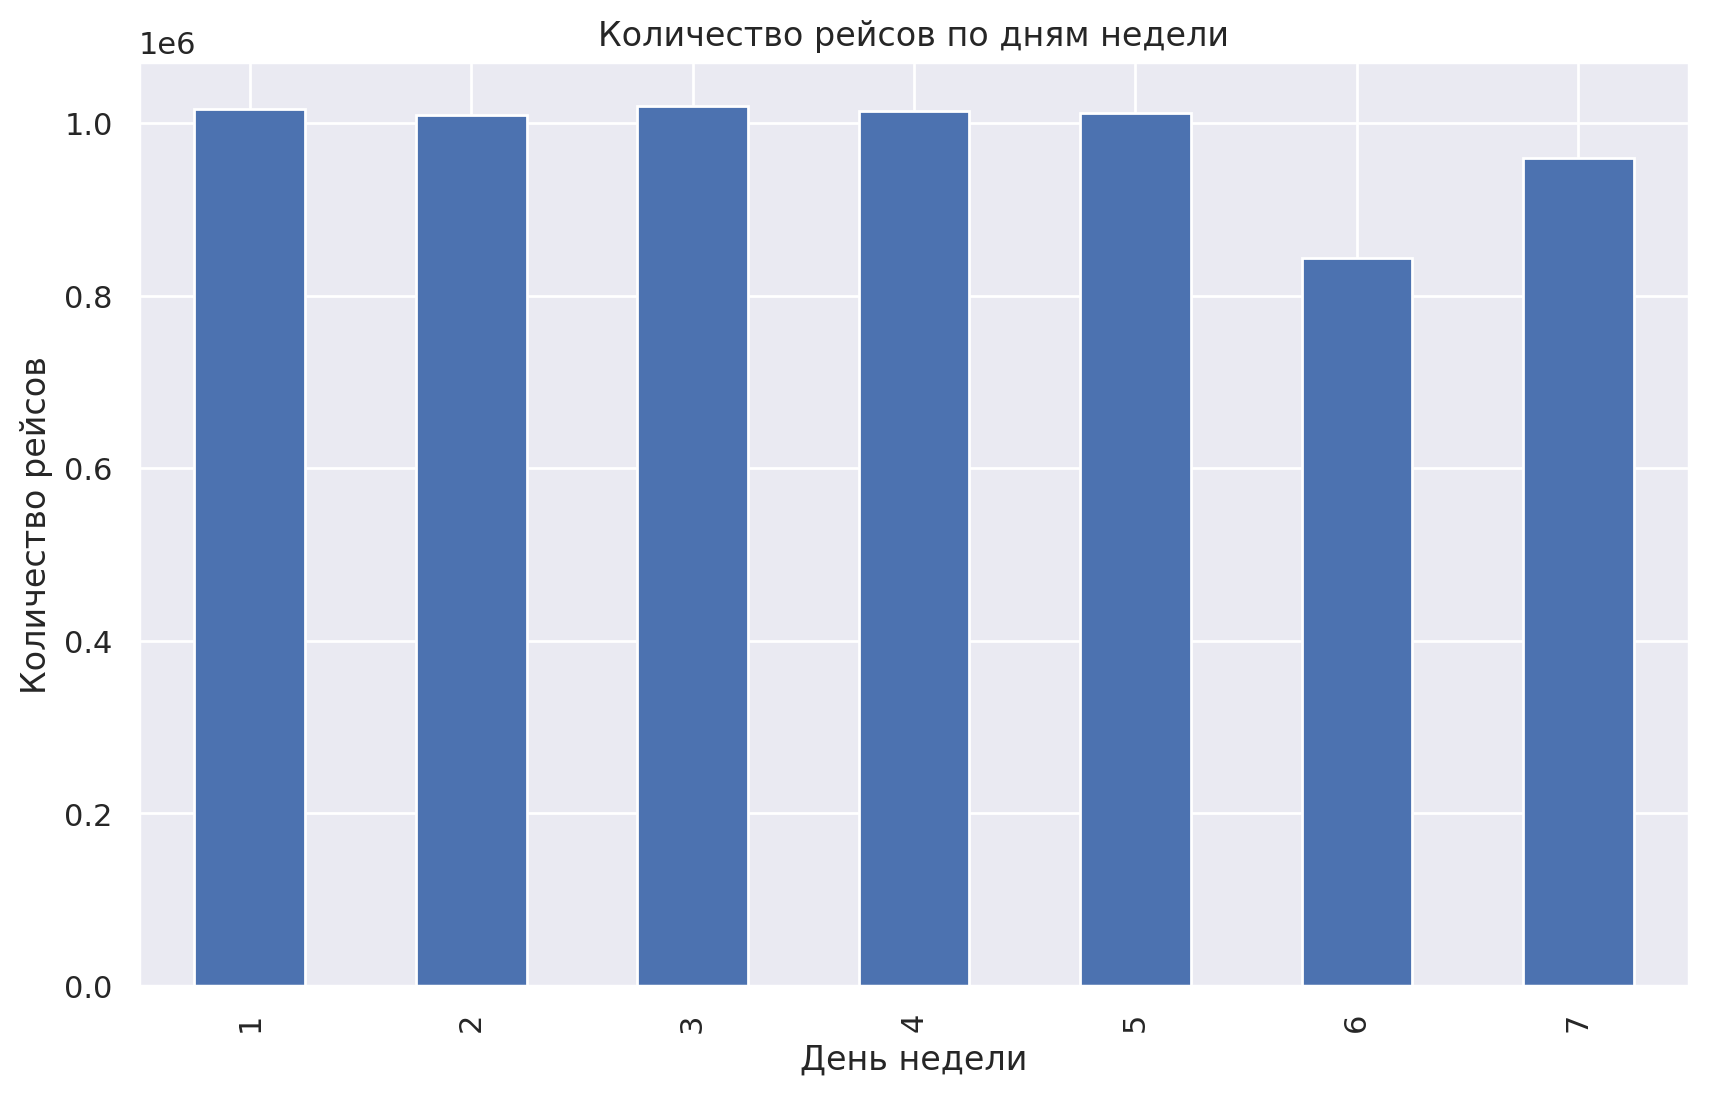

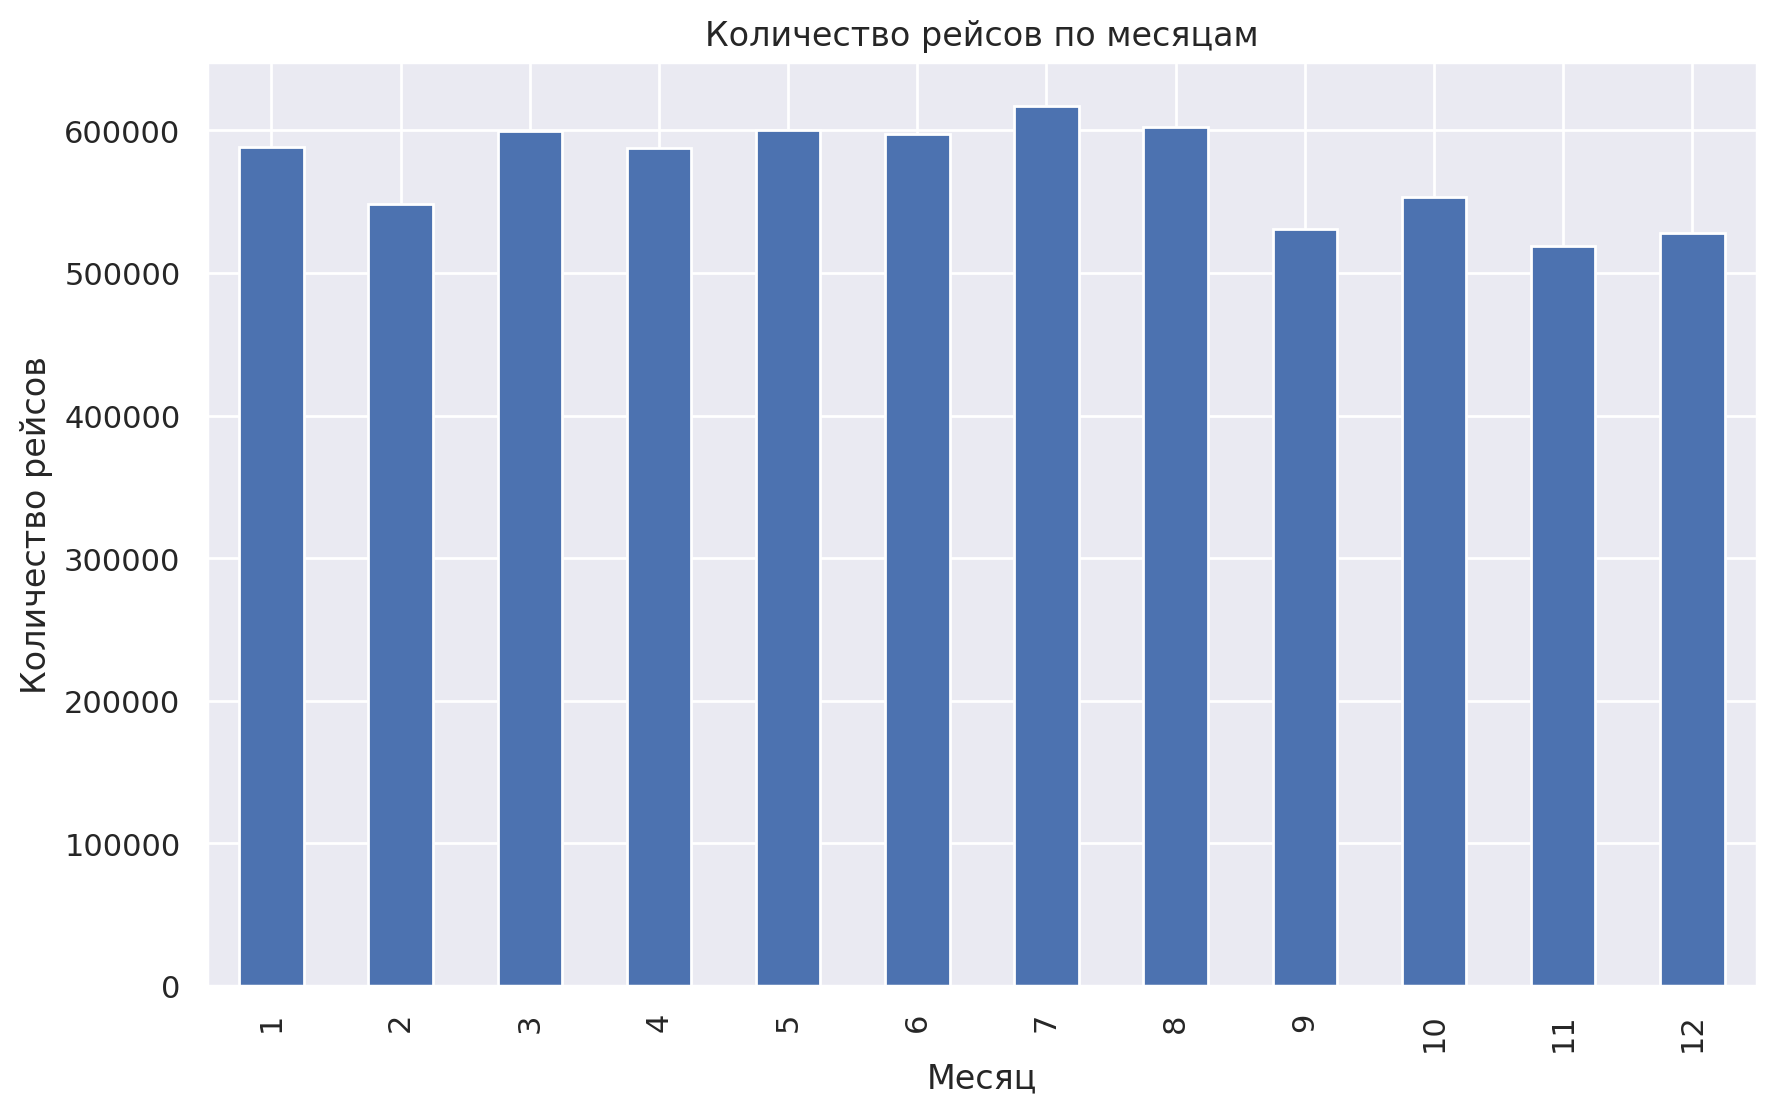

Количество рейсов в будние дни: 5070464
Количество рейсов в выходные дни: 1803018


In [56]:
# Подсчет количества рейсов по дням
daily_flights = flights_df_clean.groupby(['Year', 'Month', 'DayofMonth']).size()

# Визуализация количества рейсов по дням
daily_flights.plot(figsize=(10,6), title="Ежедневное количество рейсов", xlabel="Дата", ylabel="Количество рейсов")
plt.show()
# Подсчет количества рейсов по дням недели
weekly_flights = flights_df_clean.groupby('DayOfWeek').size()

# Визуализация количества рейсов по дням недели
weekly_flights.plot(kind='bar', figsize=(10,6), title="Количество рейсов по дням недели", xlabel="День недели", ylabel="Количество рейсов")
plt.show()
# Подсчет количества рейсов по месяцам
monthly_flights = flights_df_clean.groupby('Month').size()

# Визуализация количества рейсов по месяцам
monthly_flights.plot(kind='bar', figsize=(10,6), title="Количество рейсов по месяцам", xlabel="Месяц", ylabel="Количество рейсов")
plt.show()
# Подсчет количества рейсов в будние и выходные дни
weekday_flights = flights_df_clean[flights_df_clean['DayOfWeek'] <= 5].shape[0]
weekend_flights = flights_df_clean[flights_df_clean['DayOfWeek'] >= 6].shape[0]

print(f"Количество рейсов в будние дни: {weekday_flights}")
print(f"Количество рейсов в выходные дни: {weekend_flights}")

**<font color='red'>Вопрос 16.</font> Изучите распределение причин отмены во времени. Составьте диаграмму причин отмены, агрегированных по месяцам.**

**Выберите все правильные утверждения:**
- В октябре наименьшее количество отмен из-за погоды.
- Наибольшее количество отмен в сентябре связано с соображениями безопасности.
- Основная причина отмены рейсов в апреле – операторы связи.
- Отмены рейсов по вине Национальной воздушной системы происходят чаще, чем по вине перевозчиков.

<ipython-input-57-ac0ec664fa80>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_by_month = cancelled_flights.groupby(['Month', 'CancellationCode']).size().unstack()


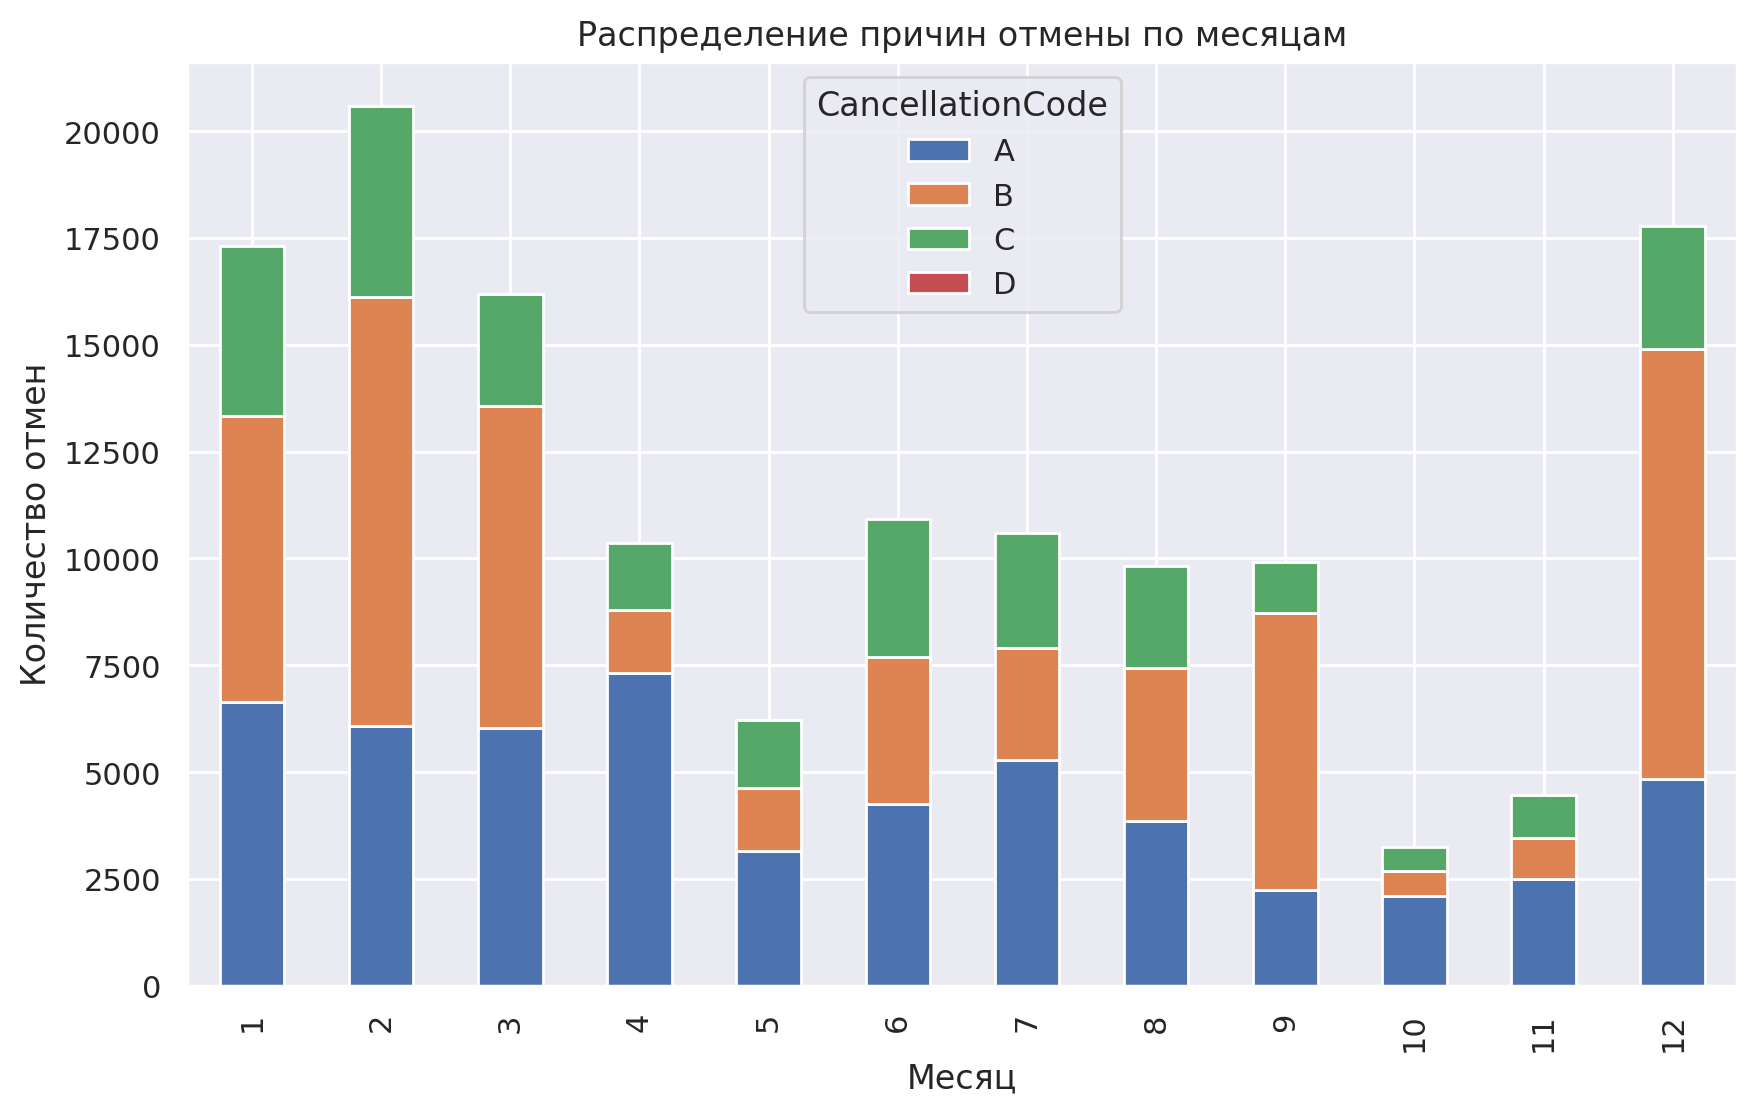

Отмены по вине Национальной воздушной системы: 28188
Отмены по вине перевозчиков: 54330


In [57]:
# Фильтрация отмененных рейсов
cancelled_flights = flights_df[flights_df['Cancelled'] == 1]

# Агрегация данных по месяцам и причинам отмены
cancellation_by_month = cancelled_flights.groupby(['Month', 'CancellationCode']).size().unstack()

# Визуализация причин отмен по месяцам
cancellation_by_month.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Распределение причин отмены по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество отмен')
plt.show()
# Сравнение отмен по причинам
total_nas_delays = cancelled_flights[cancelled_flights['CancellationCode'] == 'C'].shape[0]
total_carrier_delays = cancelled_flights[cancelled_flights['CancellationCode'] == 'A'].shape[0]

print(f"Отмены по вине Национальной воздушной системы: {total_nas_delays}")
print(f"Отмены по вине перевозчиков: {total_carrier_delays}")

**<font color='red'>Вопрос 17.</font> В каком месяце происходит наибольшее количество отмен по вине Carrier?**

- Май
- Январь
- Сентябрь
- Апрель

In [58]:
# Фильтрация отмененных рейсов по вине перевозчика (CancellationCode == 'A')
carrier_cancelled_flights = flights_df[(flights_df['Cancelled'] == 1) & (flights_df['CancellationCode'] == 'A')]
# Подсчет количества отмен по вине перевозчика по месяцам
carrier_cancellations_by_month = carrier_cancelled_flights.groupby('Month').size()

# Найти месяц с наибольшим количеством отмен
max_cancellations_month = carrier_cancellations_by_month.idxmax()
max_cancellations_count = carrier_cancellations_by_month.max()

print(f"Наибольшее количество отмен по вине перевозчика произошло в месяце: {max_cancellations_month}, с {max_cancellations_count} отменами")


Наибольшее количество отмен по вине перевозчика произошло в месяце: 4, с 7312 отменами


**<font color='red'>Вопрос 18.</font> Определите перевозчика с наибольшим количеством отмен из-за перевозчика в соответствующем месяце из предыдущего вопроса.**

- 9E
- EV
- HA
- AA

In [59]:
# Используем месяц с наибольшим количеством отмен из Вопроса 17
carrier_cancellations_in_month = flights_df[
    (flights_df['Cancelled'] == 1) &
    (flights_df['CancellationCode'] == 'A') &
    (flights_df['Month'] == max_cancellations_month)
]

# Группировка по перевозчику
carrier_cancellations_by_carrier = carrier_cancellations_in_month.groupby('UniqueCarrier').size()

# Перевозчик с наибольшим количеством отмен
max_cancelled_carrier = carrier_cancellations_by_carrier.idxmax()
max_cancelled_count = carrier_cancellations_by_carrier.max()

print(f"Наибольшее количество отмен в {max_cancellations_month}-м месяце у перевозчика: {max_cancelled_carrier}, с {max_cancelled_count} отменами")

Наибольшее количество отмен в 4-м месяце у перевозчика: AA, с 3696 отменами


<ipython-input-59-7b8e8b2c77a2>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_cancellations_by_carrier = carrier_cancellations_in_month.groupby('UniqueCarrier').size()
